<a href="https://colab.research.google.com/github/Javachip1823/COLAB/blob/main/weather_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

with open('weather_input.txt', 'r') as file:
    weather_data = file.readlines()

for record in weather_data:
    temp, humidity, wind_speed = (float(value) for value in record.strip().split())


    weather_value = 0.5 * (temp ** 2) - 0.2 * humidity + 0.1 * wind_speed - 15


    if weather_value > 10:
        condition = "Sunny"
    elif 0 <= weather_value <= 10:
        condition = "Windy"
    elif -10 <= weather_value < 0:
        condition = "Cloudy"
    else:
        condition = "Rainy"


    print(f"Temperature: {temp}, Humidity: {humidity}, Wind Speed: {wind_speed} \nThus, the weather is {condition}")


Temperature: 25.0, Humidity: 60.0, Wind Speed: 10.0 
Thus, the weather is Sunny


In [ ]:
t = int(input("Enter Temperature: "))
h = int(input("Enter Humidity: "))
wind = int(input("Enter Wind Speed: "))

w = 0.5 * (t ** 2) - (0.2 * h) + (0.1 * wind) - 15

if w > 10:
    condition = "Sunny"
elif 0 <= w <= 10:
    condition = "Windy"
elif -10 <= w < 0:
    condition = "Cloudy"
else:
    condition = "Rainy"

print(f"Temperature: {t}, Humidity: {h}, Wind Speed: {wind} \nThus, the weather is {condition}")

Enter Temperature: -12
Enter Humidity: 10
Enter Wind Speed: 4
Temperature: -12, Humidity: 10, Wind Speed: 4 
Thus, the weather is Sunny


In [ ]:
t = 10
h = 32
wind =23
w = 0.5 * (t ** 2) - (0.2 * h) + (0.1 * wind) - 15
if w > 10:
    print("Sunny")
elif 0 <= w <= 10:
    print("Windy")
elif -10 <= w < 0:
    print("Cloud")
elif w < -10:
    print("Rainy")

Sunny


In [ ]:
with open('weather_input.txt', 'r') as file:
    lines = file.readlines()
for line in lines:
    data = line.split()
    t = int(data[0])
    h = int(data[1])
    wind = int(data[2])
    w = 0.5 * (t ** 2) - (0.2 * h) + (0.1 * wind) - 15
    if w > 10:
        print("Weather is Sunny")
    elif 0 <= w <= 10:
        print("Weather is Windy")
    elif -10 <= w < 0:
        print("Weather is Cloud")
    elif w < -10:
        print("Weather is Rainy")

Weather is Sunny
Weather is Sunny
Weather is Sunny


Mean Squared Error: 3.25


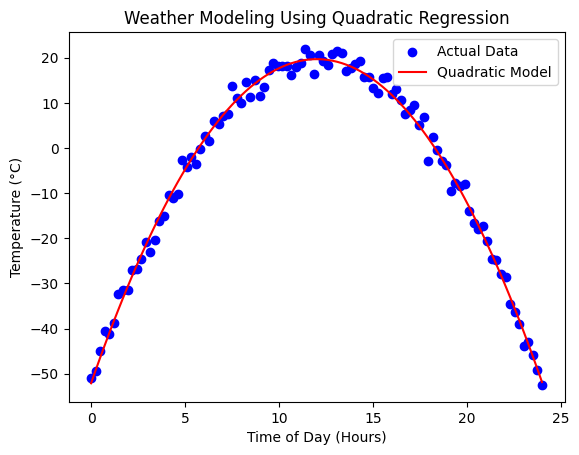

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def generate_weather_data():
    np.random.seed(42)
    time = np.linspace(0, 24, 100)
    temperature = 20 + (-0.5 * (time - 12)**2) + np.random.normal(0, 2, 100)
    return time.reshape(-1, 1), temperature.reshape(-1, 1)

def train_quadratic_model(time, temperature):
    poly = PolynomialFeatures(degree=2)
    time_poly = poly.fit_transform(time)

    model = LinearRegression()
    model.fit(time_poly, temperature)
    return model, poly

def predict_temperature(model, poly, time):
    time_poly = poly.transform(time)
    return model.predict(time_poly)

def evaluate_model(temperature_actual, temperature_pred):
    mse = mean_squared_error(temperature_actual, temperature_pred)
    print(f"Mean Squared Error: {mse:.2f}")

def visualize_results(time, temperature_actual, temperature_pred):
    plt.scatter(time, temperature_actual, color='blue', label='Actual Data')
    plt.plot(time, temperature_pred, color='red', label='Quadratic Model')
    plt.xlabel('Time of Day (Hours)')
    plt.ylabel('Temperature (°C)')
    plt.title('Weather Modeling Using Quadratic Regression')
    plt.legend()
    plt.show()

def main():
    time, temperature = generate_weather_data()

    model, poly = train_quadratic_model(time, temperature)

    temperature_pred = predict_temperature(model, poly, time)

    evaluate_model(temperature, temperature_pred)

    visualize_results(time, temperature, temperature_pred)

if __name__ == '__main__':
    main()
